In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blue_map = plt.get_cmap("Blues")
cmap = lambda ii: [blue_map(round(0.5*255)), blue_map(round(0.65*255)), blue_map(round(0.9*255))][ii]

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Arial",
})

In [3]:
def pad_histories_to_longest(list_of_losses):
    max_length = 0
    for losses in list_of_losses:
        max_length = max(max_length, len(losses))
    
    for ii, losses in enumerate(list_of_losses):
        list_of_losses[ii] = np.append(losses, [losses[-1]]*(max_length - len(losses)))
    return np.array(list_of_losses)
        
def bootstrap_median_and_confidence(list_of_losses, lower_percentile: float = 25, upper_percentile: float = 75, repetitions: int = 50):
    all_medians = []
    all_uppers = []
    all_lowers = []
    
    for rep in range(repetitions):
        possible_choices = len(list_of_losses)
        indices = np.random.choice(possible_choices, size=100)
        samples_losses = list_of_losses[indices]

        median = np.median(samples_losses, axis=0)
        upper_confidence = np.percentile(samples_losses, upper_percentile, axis=0)
        lower_confidence = np.percentile(samples_losses, lower_percentile, axis=0)
        all_medians.append(median)
        all_uppers.append(upper_confidence)
        all_lowers.append(lower_confidence)
    return np.mean(all_medians, axis=0), np.mean(all_lowers, axis=0), np.mean(all_uppers, axis=0)

# Figure 2

In [4]:
full_result_card = np.load("data/results_12cardinality6_1D_1D_all.npy", allow_pickle=True).item()
full_result_bas = np.load("data/results_12BAS_1D_1D_1_Dall.npy", allow_pickle=True).item()
full_result_vqe = np.load("data/results_9heisenberg_1D_1D_1D_all.npy", allow_pickle=True).item()

mps_cardinality_kls = [0.7669371789489396, 0.10393884859823008, 0.018744460012618466]
mps_bas_kls = [3.919002069628898, 2.298623624584084, 0.8943366652077744]
mps_energies = [1.29355696e+00, 3.78204158e-01, 2.26894712e-02]

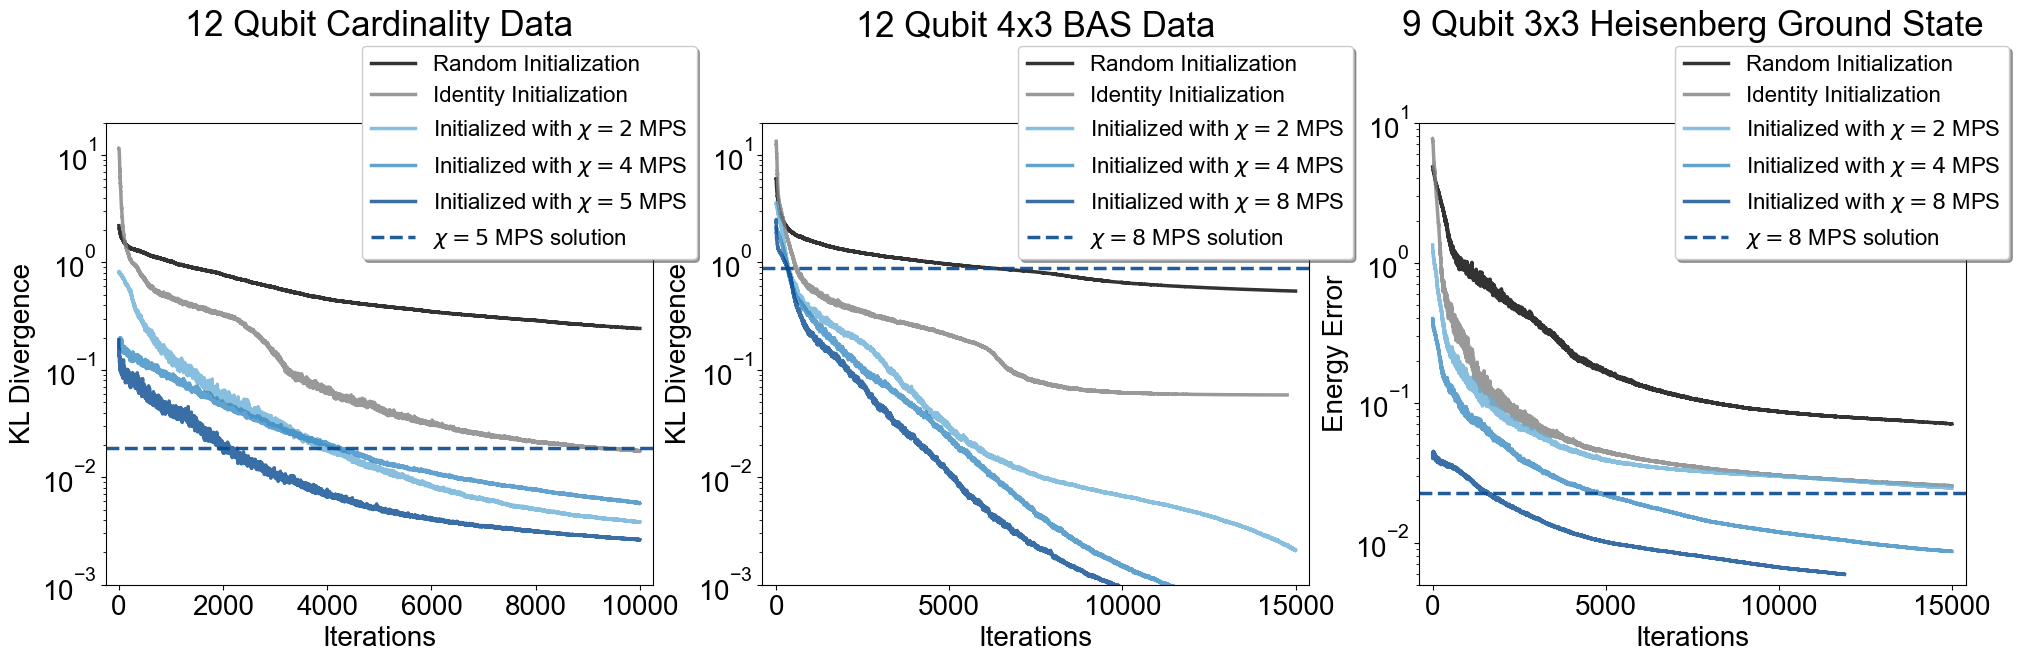

In [5]:
rasterize = True

fig, axes = plt.subplots(1, 3, figsize=(24,6))
(ax1, ax2, ax3) = axes

skip = 1
linewidth = 2.5

mbds = [2, 4, 5, 8]

for which_result, ax in zip([full_result_card, full_result_bas, full_result_vqe], axes):

    lst = which_result["random"]
    best_run_idx = np.argmin([run[-1] for run in lst])
    best_run = lst[best_run_idx]
    plot_run = best_run[::skip]
    iter_vals = range(0, len(best_run), skip)
    ax.plot(iter_vals, plot_run, color="black", label=f"Random Initialization", alpha=0.8, linewidth=linewidth, rasterized=rasterize)

    
    lst = which_result["identity"]
    best_run_idx = np.argmin([run[-1] for run in lst])
    best_run = lst[best_run_idx]
    plot_run = best_run[::skip]
    iter_vals = range(0, len(best_run), skip)
    ax.plot(iter_vals, plot_run, color="grey", label=f"Identity Initialization", alpha=0.8, linewidth=linewidth)
    
    
    counter = 0
    for kk, mbd in enumerate(mbds):    
        lst = which_result["pretrained"][mbd]
        if len(lst) == 0:
            continue
   
        lowest_vals_idx = [next((ii for ii, x in enumerate(run) if x <= 1e-3), 1e9) for run in lst]
        if min(lowest_vals_idx) < 1e8:
            best_run_idx = np.argmin(lowest_vals_idx)
        else:
            best_run_idx = np.argmin([run[-1] for run in lst])
        best_run = lst[best_run_idx]
        plot_run = best_run[::skip]
        iter_vals = range(0, len(best_run), skip)
        ax.plot(iter_vals, plot_run, color=cmap(counter), label=f"Initialized with $\chi={mbd}$ MPS", alpha=0.8, linewidth=linewidth, rasterized=rasterize)
        counter += 1
    

    ax.set_xlabel("Iterations", fontsize=20)
    ax.tick_params(labelsize=20)
    ax.set_yscale("log")   

ax1.set_ylabel("KL Divergence", fontsize=20)
ax2.set_ylabel("KL Divergence", fontsize=20)
ax3.set_ylabel("Energy Error", fontsize=20)
ax1.set_ylim(1e-3, 2e1)
ax2.set_ylim(1e-3, 2e1)
ax3.set_ylim(5e-3, 1e1)
ax1.set_xlim(-250, 10250)
ax2.set_xlim(-400, 15400)
ax3.set_xlim(-400, 15400)


ax1.hlines(mps_cardinality_kls[-1], *ax1.get_xlim(), color=cmap(2), linestyle="dashed", alpha=0.9, label="$\chi=5$ MPS solution", linewidth=2.5)
ax2.hlines(mps_bas_kls[-1], *ax2.get_xlim(), color=cmap(2), linestyle="dashed", alpha=0.9, label="$\chi=8$ MPS solution", linewidth=2.5)
ax3.hlines(mps_energies[-1], *ax3.get_xlim(), color=cmap(2), linestyle="dashed", alpha=0.9, label="$\chi=8$ MPS solution", linewidth=2.5)

for ax in axes:
    ax.legend(loc="upper right", fontsize=16, bbox_to_anchor=(1.1, 1.19), fancybox=True, shadow=True)


ax1.set_title("12 Qubit Cardinality Data", fontsize=25, y=1.17)
ax2.set_title("12 Qubit 4x3 BAS Data", fontsize=25, y=1.17)
ax3.set_title("9 Qubit 3x3 Heisenberg Ground State", fontsize=25, y=1.17)

plt.show()

# Supplementary Figure 2

In [6]:
full_result_linear = np.load("data/results_10cardinality5_1D_1D_1D.npy", allow_pickle=True).item()
full_result_extended = np.load("data/results_10cardinality5_1D_1D_all.npy", allow_pickle=True).item()

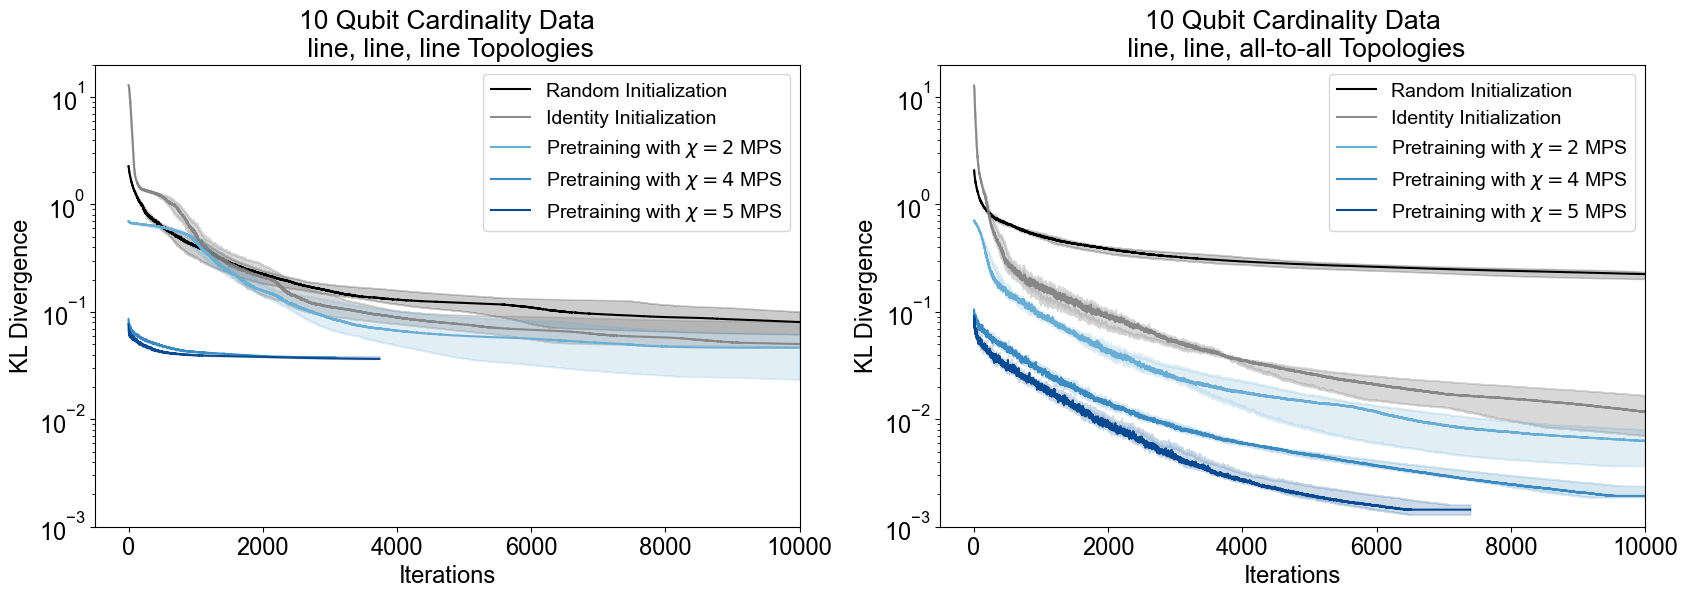

In [7]:
rasterize = True

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

mbds = [2, 4, 5]

for which_result, ax in zip([full_result_linear, full_result_extended], (ax1, ax2)):

    lst = which_result["random"]
    med, upper, lower = bootstrap_median_and_confidence(pad_histories_to_longest(lst))

    ax.fill_between(range(len(med)), upper, lower, alpha=0.2, color="black", rasterized=rasterize)
    ax.plot(med, color="black", label="Random Initialization", rasterized=rasterize)
    
    
    lst = which_result["identity"]
    med, upper, lower = bootstrap_median_and_confidence(pad_histories_to_longest(lst))

    ax.fill_between(range(len(med)), upper, lower, alpha=0.3, color="grey", rasterized=rasterize)
    ax.plot(med, color="grey", label="Identity Initialization", alpha=0.9, rasterized=rasterize)
    
    
    counter = 0
    for kk, mbd in enumerate(mbds):    
        lst = which_result["pretrained"][mbd]
        if len(lst) == 0:
            continue

        med, upper, lower = bootstrap_median_and_confidence(pad_histories_to_longest(lst))

        ax.fill_between(range(len(med)), upper, lower, alpha=0.2, color=cmap(counter), rasterized=rasterize)
        ax.plot(med, label=f"Pretraining with $\chi={mbd}$ MPS", color=cmap(counter), rasterized=rasterize)
        counter += 1


    ax.set_yscale("log")   
    ax.legend(loc="upper right", fontsize=14)
    ax.set_ylim(1e-3, 2e1)
    ax.set_ylabel("KL Divergence", fontsize=17)
    ax.set_xlabel("Iterations", fontsize=17)
    ax.tick_params(labelsize=17)
    ax.set_xlim(right=10000)
ax1.set_title("10 Qubit Cardinality Data\n line, line, line Topologies", fontsize=19)
ax2.set_title("10 Qubit Cardinality Data\n line, line, all-to-all Topologies", fontsize=19)

plt.show()

# Supplementary Figure 3

In [8]:
full_result_card = np.load("data/results_12cardinality6_1D_1D_all.npy", allow_pickle=True).item()
full_result_bas = np.load("data/results_12BAS_1D_1D_1_Dall.npy", allow_pickle=True).item()
full_result_vqe = np.load("data/results_9heisenberg_1D_1D_1D_all.npy", allow_pickle=True).item()

mps_cardinality_kls = [0.7669371789489396, 0.10393884859823008, 0.018744460012618466]
mps_bas_kls = [3.919002069628898, 2.298623624584084, 0.8943366652077744]
mps_energies = [1.29355696e+00, 3.78204158e-01, 2.26894712e-02]

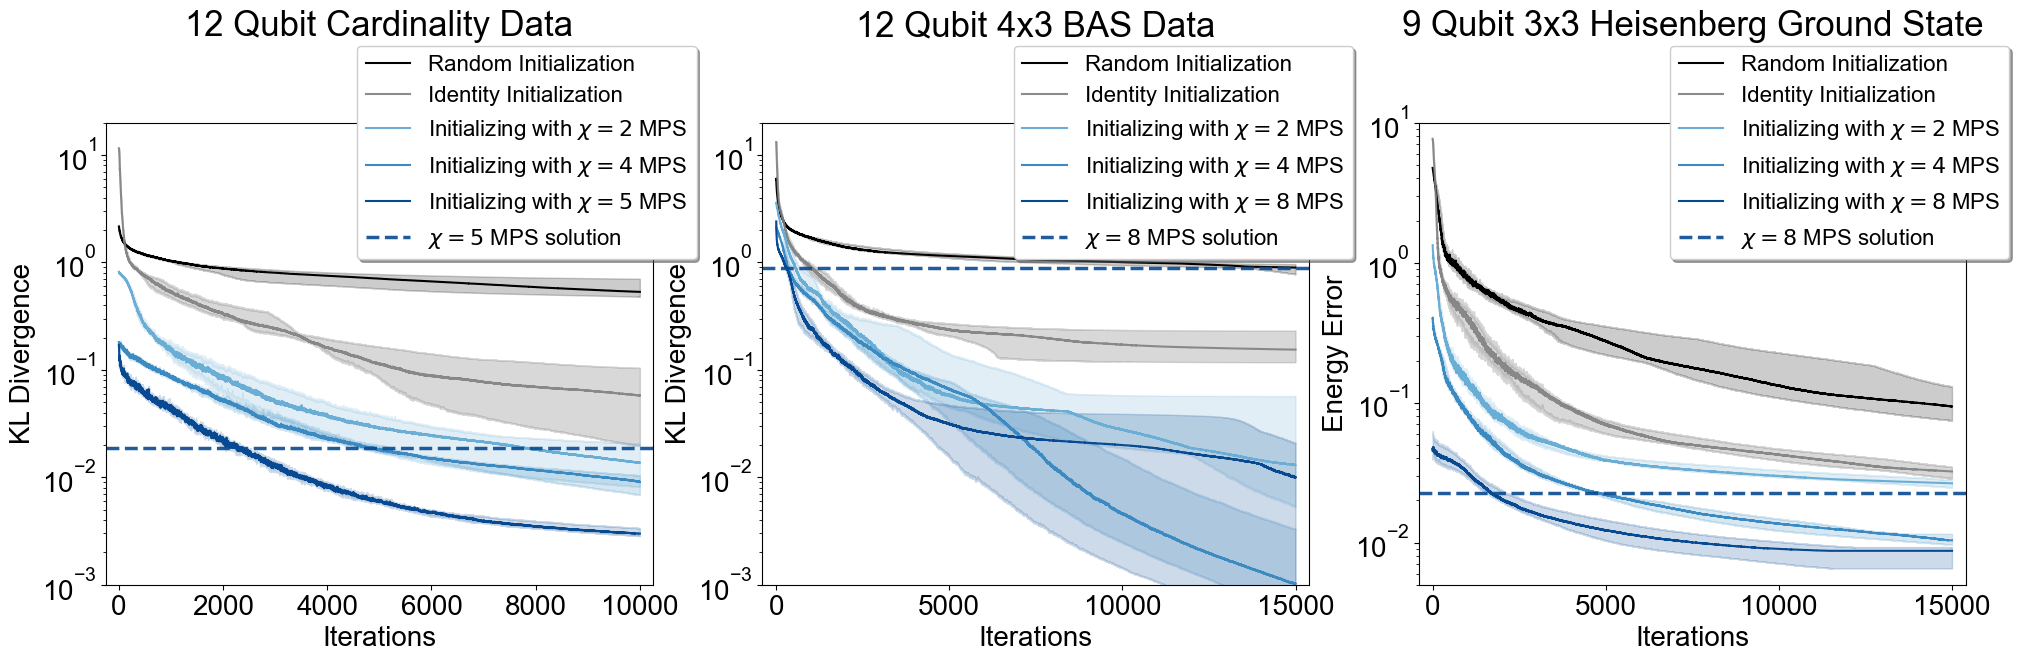

In [9]:
rasterize = True

fig, axes = plt.subplots(1, 3, figsize=(24,6))
(ax1, ax2, ax3) = axes

skip = 1
linewidth = 2.5

mbds = [2, 4, 5, 8]

for which_result, ax in zip([full_result_card, full_result_bas, full_result_vqe], axes):

    lst = which_result["random"]
    med, upper, lower = bootstrap_median_and_confidence(pad_histories_to_longest(lst))
    
    ax.fill_between(range(len(med)), upper, lower, alpha=0.2, color="black", rasterized=True)
    ax.plot(med, color="black", label="Random Initialization", rasterized=True)

    
    lst = which_result["identity"]
    med, upper, lower = bootstrap_median_and_confidence(pad_histories_to_longest(lst))
    
    ax.fill_between(range(len(med)), upper, lower, alpha=0.3, color="grey", rasterized=True)
    ax.plot(med, color="grey", label="Identity Initialization", alpha=0.9, rasterized=True)
    
    
    counter = 0
    for kk, mbd in enumerate(mbds):    
        lst = which_result["pretrained"][mbd]
        if len(lst) == 0:
            continue
            
        med, upper, lower = bootstrap_median_and_confidence(pad_histories_to_longest(lst))

        ax.fill_between(range(len(med)), upper, lower, alpha=0.2, color=cmap(counter), rasterized=True)
        ax.plot(med, label=f"Initializing with $\chi={mbd}$ MPS", color=cmap(counter), rasterized=True)
        counter += 1
            

    ax.set_xlabel("Iterations", fontsize=20)
    ax.tick_params(labelsize=20)
    ax.set_yscale("log")   

ax1.set_ylabel("KL Divergence", fontsize=20)
ax2.set_ylabel("KL Divergence", fontsize=20)
ax3.set_ylabel("Energy Error", fontsize=20)
ax1.set_ylim(1e-3, 2e1)
ax2.set_ylim(1e-3, 2e1)
ax3.set_ylim(5e-3, 1e1)
ax1.set_xlim(-250, 10250)
ax2.set_xlim(-400, 15400)
ax3.set_xlim(-400, 15400)


ax1.hlines(mps_cardinality_kls[-1], *ax1.get_xlim(), color=cmap(2), linestyle="dashed", alpha=0.9, label="$\chi=5$ MPS solution", linewidth=2.5)
ax2.hlines(mps_bas_kls[-1], *ax2.get_xlim(), color=cmap(2), linestyle="dashed", alpha=0.9, label="$\chi=8$ MPS solution", linewidth=2.5)
ax3.hlines(mps_energies[-1], *ax3.get_xlim(), color=cmap(2), linestyle="dashed", alpha=0.9, label="$\chi=8$ MPS solution", linewidth=2.5)

for ax in axes:
    ax.legend(loc="upper right", fontsize=16, bbox_to_anchor=(1.1, 1.19), fancybox=True, shadow=True)



ax1.set_title("12 Qubit Cardinality Data", fontsize=25, y=1.17)
ax2.set_title("12 Qubit 4x3 BAS Data", fontsize=25, y=1.17)
ax3.set_title("9 Qubit 3x3 Heisenberg Ground State", fontsize=25, y=1.17)

plt.show()